# PART 1 - Exploratory Data Analysis

In [1]:
import json
import pandas as pd

In [2]:
# Read in the json file
data = pd.read_json("logins.json")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
print(data.head())

           login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21


In [5]:
# Sort the data for ascending time
data_sorted = data.sort_values(by=['login_time'])

In [6]:
print(data_sorted.head())

           login_time
6 1970-01-01 20:12:16
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
3 1970-01-01 20:16:36
2 1970-01-01 20:16:37


In [7]:
# reset the index and drop the old index
data_sorted.reset_index(inplace=True, drop=True)

In [8]:
print(data_sorted.head())

           login_time
0 1970-01-01 20:12:16
1 1970-01-01 20:13:18
2 1970-01-01 20:16:10
3 1970-01-01 20:16:36
4 1970-01-01 20:16:37


In [9]:
# Set the login_time as index to do resampling later and add a column count as 1 to aggregate on something
data_sorted.set_index('login_time', inplace=True)

In [10]:
data_sorted['count'] = 1

In [11]:
# resample for 15 min intervals
data_count = data_sorted.resample('15T').sum()

In [12]:
data_count

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


In [13]:
# reset index
data_count.reset_index(inplace=True)

In [14]:
data_count.head()

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


We can add two new columns showing the 'hour' and the 'day' of the week to this dataset so that we can do further analysis of the pattern of the counts.

In [15]:
# Add 2 columns showing just the hour and the day
data_count["hour"] = data_count["login_time"].dt.hour
data_count["day"] = data_count["login_time"].dt.day_name()

In [16]:
data_count

,login_time,count,hour,day
0,1970-01-01 20:00:00,2,20,Thursday
1,1970-01-01 20:15:00,6,20,Thursday
2,1970-01-01 20:30:00,9,20,Thursday
3,1970-01-01 20:45:00,7,20,Thursday
4,1970-01-01 21:00:00,1,21,Thursday
...,...,...,...,...
9783,1970-04-13 17:45:00,5,17,Monday
9784,1970-04-13 18:00:00,5,18,Monday
9785,1970-04-13 18:15:00,2,18,Monday
9786,1970-04-13 18:30:00,7,18,Monday


We can find out the total counts and average counts based on the day of the week. For this, we can create a new dataframe, data_daily.

In [17]:
# groupby the day and sum the counts to a new df data_daily and to get it in the correct order instead of alphabetical 
# pass the correcct order for indexing

cats = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
data_daily = data_count.groupby(['day'])[['count']].sum().reindex(cats) 

In [18]:
# add a column for average in data_daily

data_daily["daily_avg"] = data_count.groupby("day")[['count']].mean()

In [19]:
data_daily 

,count,daily_avg
day,,
Monday,8823,6.213380
Tuesday,9268,6.895833
Wednesday,10339,7.692708
Thursday,11960,8.794118
Friday,15208,10.561111
Saturday,19377,13.456250
Sunday,18167,12.615972


We can create another dataframe data_hour to show the average counts on different hours of the day.

In [20]:
# Groupby hour and get the mean counts in a new df data_hour

data_hour = data_count.groupby("hour")[['count']].mean()

In [21]:
data_hour

,count
hour,
0,14.688725
1,15.482843
2,14.215686
3,11.840686
4,12.338235
5,7.218137
6,2.789216
7,1.997549
8,2.004902


We can also add another column in the data_count for showing if the login happened during the day or night. For this distinction, instead of taking the 12 hr cycle or 0-12 as AM and 12-24 as PM, I took 7-20 as 'D' for day (7 am to 7 pm) and 7pm to 7 am as 'N' for night.

In [22]:
# add a column for day/night distinction based on 7 am to 7 pm as day

day_night = lambda row: "D" if row in range(7,20) else "N"
data_count["day/night"] = data_count["hour"].apply(day_night)

In [23]:
data_count

,login_time,count,hour,day,day/night
0,1970-01-01 20:00:00,2,20,Thursday,N
1,1970-01-01 20:15:00,6,20,Thursday,N
2,1970-01-01 20:30:00,9,20,Thursday,N
3,1970-01-01 20:45:00,7,20,Thursday,N
4,1970-01-01 21:00:00,1,21,Thursday,N
...,...,...,...,...,...
9783,1970-04-13 17:45:00,5,17,Monday,D
9784,1970-04-13 18:00:00,5,18,Monday,D
9785,1970-04-13 18:15:00,2,18,Monday,D
9786,1970-04-13 18:30:00,7,18,Monday,D


We can create another dataframe, data_DN grouping by day and day/night to see the sum and average of the counts. This tells us of not just patterns for different days but also during day or night.

In [24]:
# groupby day and day/night and do sum and mean of counts to add the resp columns

data_DN = data_count.groupby(['day','day/night'])[['count']].sum()

In [25]:
data_DN['avg'] = data_count.groupby(['day','day/night'])[['count']].mean()

In [26]:
data_DN

count        avg
day       day/night                  
Friday    D           6458   8.279487
          N           8750  13.257576
Monday    D           4813   6.202320
          N           4010   6.226708
Saturday  D           6415   8.224359
          N          12962  19.639394
Sunday    D           6466   8.289744
          N          11701  17.728788
Thursday  D           5295   7.273352
          N           6665  10.545886
Tuesday   D           4521   6.210165
          N           4747   7.706169
Wednesday D           4725   6.490385
          N           5614   9.113636

We now have 3 dataframes, data_daily - grouped on days for total and average counts, data_hour - grouped on hour for average counts and data_DN - gtouped on day and day/night for total and average counts.  We can add one more df data_hd - grouped on hour and day for total counts.

In [27]:
# groupby hour and then day to get the total counts.

data_hd = data_count.groupby(['hour','day'])[['count']].mean().reset_index()

In [28]:
data_hd

,hour,day,count
0,0,Friday,16.250000
1,0,Monday,8.850000
2,0,Saturday,20.900000
3,0,Sunday,18.716667
4,0,Thursday,14.571429
...,...,...,...
163,23,Saturday,16.766667
164,23,Sunday,9.283333
165,23,Thursday,17.216667
166,23,Tuesday,12.928571


## Visualizations

In [29]:
from matplotlib import pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Average logins on different days of the week')

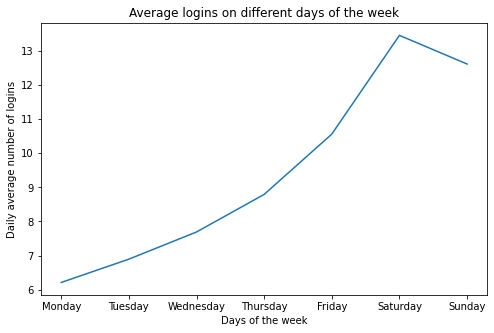

In [30]:
# Plot the average counts for different days of the week

fig = plt.figure(figsize=(8,5))
plt.plot(data_daily['daily_avg'])
plt.xlabel('Days of the week')
plt.ylabel('Daily average number of logins')
plt.title('Average logins on different days of the week')

We see that the average count increases steadily from Monday to the weekend and then comes down. This is probably because closer to a weekend is when people start going out more.

Text(0.5, 1.0, 'Total logins on different hours')

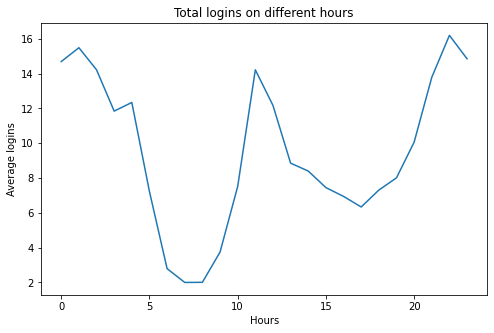

In [31]:
# Plot the average counts during the different hours in a day

fig = plt.figure(figsize=(8,5))
plt.plot(data_hour['count'])
plt.xlabel('Hours')
plt.ylabel('Average logins')
plt.title('Total logins on different hours')

From 7 am to 6 pm we can see the average logins are generally low with a sharp peak during noon. After 6 pm, it steadily increases till 4 am. This can be explained by work/life pattern in general. 

In [32]:
import seaborn as sns

[Text(0.5, 1.0, 'Average Logins per Hour for different days of the week')]

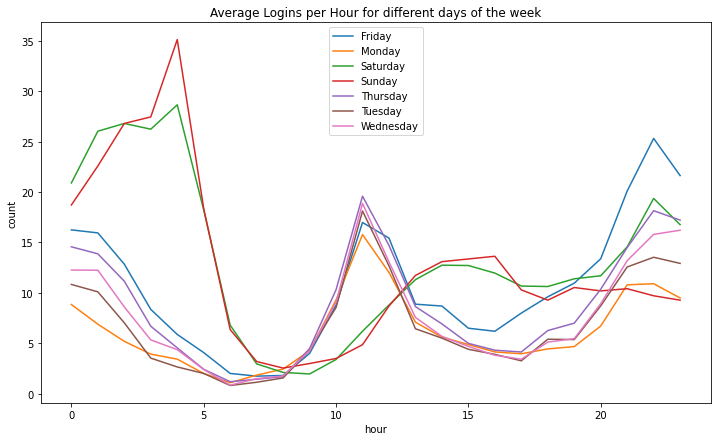

In [33]:
# plot the average counts for each hour for different days

f, axes = plt.subplots(figsize=(12,7))
ax = sns.lineplot(x="hour", y="count", data=data_hd, hue="day")
ax.legend(loc="upper center")
ax.set(title="Average Logins per Hour for different days of the week")

This shows the pattern of the logins by day and time. The red and green represent the weekend while the others are weekdays. Weekdays are all similar except for Friday which is blue, the logins increase after noon and is the highest for that night. This is similar to how people behave just before a weekend. Saturday and Sunday, logins are higher than weekdays till 5 am and then falls below weekday levels and then again increases after noon. Both days are pretty similar till evening 5 pm after which Sunday logins come down unlike Saturday logins. This is natural considering that people want to be back home and prepare for the week ahead.

# Part 2 Experiment and metrics design

1) If the drivers were made available in both cities and the toll costs were reimbursed by the company, the key measure of success for this step would be to see an increase in ridership logins to the extent that it more than justifies the cost for tolls. 
    If increase in ridership shows increased profits that justifies toll payments, it has made an impact. 

2) A practical experiment to test the effectiveness of the proposed change with respect to the keymeasure of success:

    a) I would allocate half the number of drivers in Metropolis and half the number of drivers in Gotham as permissible to serve both cities while the remaining halves will be restricted to their respective cities. So, now we have a control  population (serving their respective city only) and test population (serving both cities). This way the playing field is even because of the complementary circadian rhythms in the two cities.
    
    b) My null hypothesis for this experiment would be that the proposed change does not bring about any significant change in ridership. Alternative hypothesis would be that the change does significantly increase the ridership. Increase in ridership is considered significant based on the p value. This increase should also be checked further for the company's expense in toll reimbursement.
    
    c)  If the increase in ridership is significant but not enough to justify the cost in toll reimbursements, the business model has not worked even with the rejection of the null hypothesis. The percentage increase in business should be more than all costs. This percentage increase in business should also give an idea if the full conversion of the drivers will make it worthwhile. The proposed change would really be better studied if we could get data on the ridership volume and the time the trip was made between the two cities.
   

# Part 3 Predictive Modeling

In [34]:
# Read in the json file

openfile = open('ultimate_data_challenge.json')
jsondata = json.load(openfile)
df = pd.DataFrame(jsondata)

openfile.close()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [36]:
print(df.head())

             city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver  
0         46.2      3.67                   

### Exploratory data analysis

User retention is defined as active if they have taken a trip in the last 30 days before the data was pulled out. We can consider the latest month in the last_trip_date column as the month when data was pulled out. Another column for the user_status is added to the df and is marked 1 for active and 0 for inactive.

In [37]:
from datetime import datetime as dt

In [38]:
# the dates are strings - need to convert to datetime

df['last_trip_date'][0]

'2014-06-17'

In [39]:
# converting dates to datetime

df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

After sorting the last_trip_date, we get the latest entry as 2014-07-01 - so the data was pulled out on July 1st. So, any user entry in June (the sixth month) will be marked as 'active' or 1 and the rest will be 'inactive' or 0.

In [40]:
# sorted the last_trip_date and got the latest entry ar 2014-07-01 
last_trip_sorted = df['last_trip_date'].sort_values(axis=0).reset_index(drop=True)
last_trip_sorted[49999]

Timestamp('2014-07-01 00:00:00')

In [41]:
# checked if each entry in last_trip_date is between June 1st and June 30th - the values are added to 
# a list, is_retained

d1 = dt(2014,6,1)
d2 = dt(2014,6,30)
is_retained = []
for i in df['last_trip_date']:
    if i > d1 and i < d2:
        is_retained.append(1)
    else:
        is_retained.append(0)

In [42]:
# is_retained is added as a column, user_status to the df

df['user_status'] = is_retained

In [43]:
# total number of active users or retained users 

retained = df['user_status'].sum()

In [44]:
print('Percentage of Users retained is ' + str(retained / len(df['user_status'])*100))

Percentage of Users retained is 32.708


Almost 33% of the users are retained. So that means we have a an imbalanced dataset. This should be kept in mind for all further analysis and predictions.

There is some missing data in the following columns of the dataset - avg_rating_of_driver, avg_rating_by_driver, phone. The missing values of the average ratings of the drivers and by the drivers can be replaced by the mean value of their column. The missing value for phone can be replaced by 'other' in the dataset.

In [45]:
# number os missing values in the 3 columns

print('No. of null values in avg_rating_of_driver: ' +str(df['avg_rating_of_driver'].isna().sum()))
print('No. of null values in avg_rating_by_driver: ' +str(df['avg_rating_by_driver'].isna().sum()))
print('No. of null values in phone: ' +str(df['phone'].isna().sum()))

No. of null values in avg_rating_of_driver: 8122
No. of null values in avg_rating_by_driver: 201
No. of null values in phone: 396


In [46]:
# take the mean values in the df

df.mean()

C:\Users\Harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


trips_in_first_30_days     2.278200
avg_rating_of_driver       4.601559
avg_surge                  1.074764
surge_pct                  8.849536
ultimate_black_user        0.377080
weekday_pct               60.926084
avg_dist                   5.796827
avg_rating_by_driver       4.778158
user_status                0.327080
dtype: float64

In [47]:
# fill the NA's with the mean of the respective columns

df = df.fillna(round(df.mean(),1))

C:\Users\Harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
# fill the NA's in the 'phone' column with 'Other'

df['phone'] = df['phone'].fillna('Other')

In [49]:
# Now all the NA's are gone.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
 12  user_status             50000 non-null  int64 

### Visualisations

Text(0.5, 1.0, 'Number of Active/Inactive users')

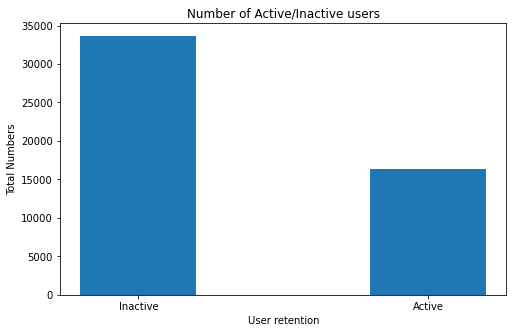

In [50]:
# Plot the user retention numbers

fig = plt.figure(figsize=(8,5))
x = ['Inactive', 'Active']
nos = [(df['user_status'] == 0).sum(), (df['user_status'] == 1).sum()]

plt.bar(x,nos, width=0.4)
plt.xlabel('User retention')
plt.ylabel('Total Numbers')
plt.title('Number of Active/Inactive users')

Text(0.5, 1.0, 'Users with the percentage of weekday use')

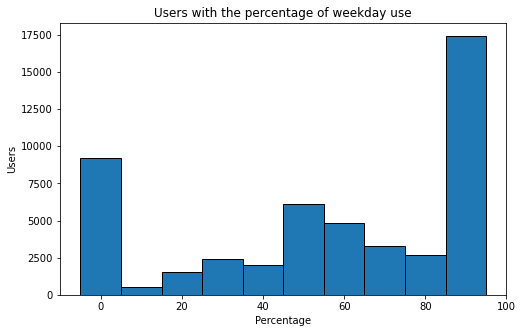

In [51]:
# plot the number of users with different percentages of weekday usage

fig = plt.figure(figsize=(8,5))
plt.hist(df['weekday_pct'], bins=10, align='left', edgecolor='black')
plt.xlabel('Percentage')
plt.ylabel('Users')
plt.title('Users with the percentage of weekday use')

Text(0.5, 1.0, 'Total logins on different months')

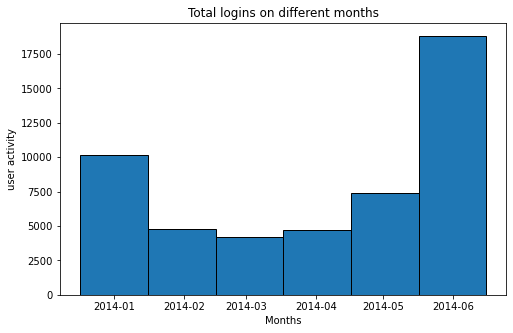

In [52]:
# Plot histogram of number of user activity for each month till June.

fig = plt.figure(figsize=(8,5))
plt.hist(df['last_trip_date'], bins=6, align='left', edgecolor='black')
plt.xlabel('Months')
plt.ylabel('user activity')
plt.title('Total logins on different months')

We can tell by looking at the 2 histograms above that the month of June shows maximum number of users and almost the same number are weekday users. We can probably say that the ridership has increased in June even during the weekdays - this could be because of vacation.

In [53]:
# Copute the correlation matrix
correlation = df.corr()

In [54]:
print(correlation)

                        trips_in_first_30_days  avg_rating_of_driver  \
trips_in_first_30_days                1.000000             -0.010861   
avg_rating_of_driver                 -0.010861              1.000000   
avg_surge                            -0.001841             -0.021660   
surge_pct                             0.005720             -0.003283   
ultimate_black_user                   0.112210             -0.001879   
weekday_pct                           0.050388              0.012609   
avg_dist                             -0.136329              0.028373   
avg_rating_by_driver                 -0.039187              0.101634   
user_status                           0.143734             -0.011768   

                        avg_surge  surge_pct  ultimate_black_user  \
trips_in_first_30_days  -0.001841   0.005720             0.112210   
avg_rating_of_driver    -0.021660  -0.003283            -0.001879   
avg_surge                1.000000   0.793582            -0.078791   
sur

From the correlation matrix above, we see that user_status is positively correlated with tripsin first 30 days and ultimate_black_user, but nothing very highly correlated. We do not see the datetime columns and I am sure that the last_trip_date will be highly correlated to user_status.

### Predictive Modeling

Predicting the user retention for the sixth month is a classification problem - Binary classification. We need to build a model that can predict whether a user is retained (1) or not (0) in the 6th month. I will be using the Random Forest Classifier here.

Before any kind of normalisation, transformations or model building, we need to convert the categorical/string variables to numeric - 'city' and the 'phone'. We then drop the original 'city' and 'phone' columns and create the new_df which contains only numeric features. Since, the datetime columns - signup_date and last_trip_date - are mostly to calculate the retention label as active or inactive, we can drop these too. The predicting features are then taken into another variable X and the label as y. The features are then scaled to have values between 0 and 1. The X_scaled and y are then ready to be split into training and test data.

In [55]:
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

In [56]:
# Label encoding the 'city' column

LE = LabelEncoder()
df['city_code'] = LE.fit_transform(df['city'])

In [57]:
print(df['city'].unique())
print(df['city_code'].unique())

["King's Landing" 'Astapor' 'Winterfell']
[1 0 2]


In [58]:
# encoding the 'phone' column

df['phone_code'] = LE.fit_transform(df['phone'])

In [59]:
print(df['phone'].unique())
print(df['phone_code'].unique())

['iPhone' 'Android' 'Other']
[2 0 1]


In [60]:
# Drop the original 'city' and 'phone', and the datetime columns

new_df = df.drop(['city','phone','signup_date', 'last_trip_date'], axis=1)

In [61]:
new_df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,user_status,city_code,phone_code
0,4,4.7,1.10,15.4,True,46.2,3.67,5.0,1,1,2
1,0,5.0,1.00,0.0,False,50.0,8.26,5.0,0,0,0
2,3,4.3,1.00,0.0,False,100.0,0.77,5.0,0,0,2
3,9,4.6,1.14,20.0,True,80.0,2.36,4.9,1,1,2
4,14,4.4,1.19,11.8,False,82.4,3.13,4.9,0,2,0


In [62]:
# labels

y = new_df['user_status']

In [63]:
# drop the labels from the new_df and store column names

new_df = new_df.drop(['user_status'],axis=1)
col_names = new_df.columns

In [64]:
# predictor numerical features 

X = new_df

In [65]:
# scaled the features to be between 0 and 1

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [66]:
# Split the scaled data to train and test such that 70% is train and 30% is test data.

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=10)

In [67]:
print('Train features shape:' + str(X_train.shape))
print('Train label shape:' + str(y_train.shape))
print('Test features shape:' + str(X_test.shape))
print('Test features shape:' + str(y_test.shape))

Train features shape:(35000, 10)
Train label shape:(35000,)
Test features shape:(15000, 10)
Test features shape:(15000,)


We will first run a baseline model with default setting of the random forestclassifier. Since there is a slight class imbalance, we set the class_weights as 'balanced'. Then the model will be used to predict on the test data. Performance will be evaluated by the f1 score, precision and recall. Classification report generates all the performance metrics. We can then do some hyperparametric tuning by using RandomizedSearchCV. Crossvalidation used in this tool is stratifiedK-fold (k=3) and scoring is f1_macro as macro makes sure that the smaller class (active) is also weighed correctly.

In [68]:
# Instantiate model - class_weight is set as 'balanced' as we have some imbalance in the dataset.
rf = RandomForestClassifier(class_weight= 'balanced', random_state = 10)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=10)

In [69]:
# Use predict method on the test data

predictions = rf.predict(X_test)

In [70]:
# print the classification report
report_baseline = classification_report(y_test, predictions, output_dict=True)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      9999
           1       0.62      0.57      0.59      5001

    accuracy                           0.74     15000
   macro avg       0.71      0.70      0.70     15000
weighted avg       0.74      0.74      0.74     15000



In [71]:
# To check if the model is overfitting, predict on the train set to see performance

ytrain_predictions = rf.predict(X_train)

In [72]:
# print the classification_report

report_train = classification_report(y_train, ytrain_predictions, output_dict=True)
print(classification_report(y_train, ytrain_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23647
           1       1.00      1.00      1.00     11353

    accuracy                           1.00     35000
   macro avg       1.00      1.00      1.00     35000
weighted avg       1.00      1.00      1.00     35000



The results between the predictions on the train and test set are not too far apart - shows that overfitting did not happen.

In [73]:
# Using the RandomizedSearchCV, we chose a few parameters to tune the model.
# create a dictionary of parametric values

random_grid = {'n_estimators': [100,300,500,700,900],
               'max_features': ['sqrt','log2','auto'],
               'bootstrap': [True, False]}

In [74]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

rf = RandomForestClassifier(class_weight= 'balanced', random_state = 10)

# Random search of parameters, using 3 fold cross validation, 
# search across 20 different combinations
# scoring is set to f1_macro

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, scoring='f1_macro', random_state=10)

# Fit the random search model

rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=10),
                   n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['sqrt', 'log2',
                                                         'auto'],
                                        'n_estimators': [100, 300, 500, 700,
                                                         900]},
                   random_state=10, scoring='f1_macro')

In [75]:
# the best parameters

best_parameters = rf_random.best_params_

In [76]:
print(best_parameters)

{'n_estimators': 700, 'max_features': 'sqrt', 'bootstrap': True}


In [77]:
# Best model with the best parameters

best_model = rf_random.best_estimator_

In [78]:
# Use the best_model to fit the training set

best_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='sqrt',
                       n_estimators=700, random_state=10)

In [79]:
# Used the best_model to predict on the test set

ypred_cv = best_model.predict(X_test)

In [80]:
# print the classification report

report_best_model = classification_report(y_test, ypred_cv, output_dict=True)
print(classification_report(y_test, ypred_cv))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      9999
           1       0.62      0.58      0.60      5001

    accuracy                           0.74     15000
   macro avg       0.71      0.70      0.70     15000
weighted avg       0.74      0.74      0.74     15000



In [81]:
# Collecting the numbers into a list

f1_macro = [report_baseline['macro avg']['f1-score'],report_best_model['macro avg']['f1-score']]
Precision = [report_baseline['macro avg']['precision'],report_best_model['macro avg']['precision']]
Recall = [report_baseline['macro avg']['recall'],report_best_model['macro avg']['recall']]

In [82]:
print('The f1-score macro went from '+ str(round(f1_macro[0],2))+ ' in baseline to '+str(round(f1_macro[1],2))+' in the tuned model')
print('The f1 macro for Precision went from '+ str(round(Precision[0],2))+ ' in baseline to '+str(round(Precision[1],2))+' in the tuned model')
print('The f1 macro for Recall went from '+ str(round(Recall[0],2))+ ' in baseline to '+str(round(Recall[1],2))+' in the tuned model')

The f1-score macro went from 0.7 in baseline to 0.7 in the tuned model
The f1 macro for Precision went from 0.71 in baseline to 0.71 in the tuned model
The f1 macro for Recall went from 0.7 in baseline to 0.7 in the tuned model


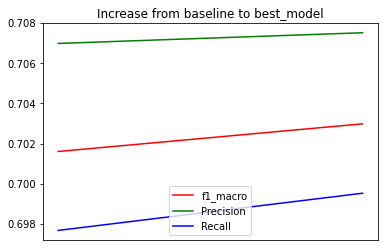

In [83]:
plt.plot(f1_macro, color='red', label='f1_macro')
plt.plot(Precision, color='green', label='Precision')
plt.plot(Recall, color='blue', label='Recall')
plt.title('Increase from baseline to best_model')
plt.xticks([])
plt.legend()

In [84]:
# Print the features and their scores - feature importance

print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), best_model.feature_importances_), col_names), reverse=True))

Features sorted by their score:
[(0.3174, 'avg_dist'), (0.1348, 'weekday_pct'), (0.1003, 'avg_rating_by_driver'), (0.0874, 'trips_in_first_30_days'), (0.0859, 'avg_rating_of_driver'), (0.0727, 'surge_pct'), (0.0709, 'city_code'), (0.0599, 'avg_surge'), (0.043, 'phone_code'), (0.0277, 'ultimate_black_user')]


### Discussion

We chose the RandomForest Classifier for this classification problem. The performance was evaluated by the f1 macro score which also accounts for the 'smaller' active population  - which is important in this imbalanced dataset. Precision and recall have also been measured. 

From this model, an insight that can help increase user retention is to get more long distance riders and riders on weekdays. Regular long distance travellers tend to stick to a routine service.